# Using PCA for dimension reduction, and K Nearest Neighbors:
# Terry Snow 22/1/17
# based on testimage, using normalized images

In [1]:
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
#pwd should 'C:\\Users\\snowt\\ML\\BigData' for QAL 
#pwd should be '/Users/terrysnow/Big Data' for home

In [3]:
%pwd

'/Users/terrysnow/Big Data/Faces'

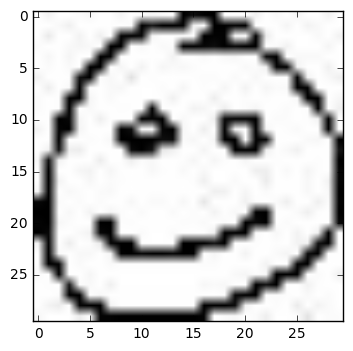

In [4]:
#path = "scan000S.jpeg"
#QAL
#path = "data/faces/scan001S.jpeg"
path = "data/facesnorm/scan001S.jpeg"
face = mpimg.imread(path,format='jpeg')
plt.imshow(face,cmap=plt.get_cmap("gray"))

In [5]:
#size of image matrix

In [6]:
image_shape=np.shape(face)
NROWS,NCOLS = image_shape
image_shape
NROWS,NCOLS

(30, 30)

In [7]:
import glob

In [8]:
imfiles = glob.glob("data/facesnorm/*.jpeg")

In [9]:
f=imfiles[0]
np.shape(imfiles)

(119,)

In [10]:
#I should have 4*6*5 = 120 files , 1 file is missing, it is the first face on Daniels page

In [11]:
print(f), f[-6]
SMILEY_INDEX = -6

data/facesnorm/Scan000S.jpeg


In [12]:
#Image has to be flattened for the PCA algo to work
imdata = np.zeros((119,NROWS*NCOLS))
imdatatype = np.ravel(np.zeros(119,))

In [13]:
for i,f in enumerate(imfiles):
    im = mpimg.imread(f,'grey')
    imflat = im.flatten()/255.0
    typetest = 0 if f[SMILEY_INDEX]=='S' else 1
    imtype = np.array(typetest)
    imdata[i] = imflat
    imdatatype[i] = imtype

In [14]:
np.shape(imdata)

(119, 900)

In [15]:
np.shape(imdatatype)

(119,)

In [16]:
imdatatype = np.ravel(imdatatype)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(imdata,imdatatype, random_state=0)

In [18]:
#The data set has been split into a training set and test set

In [19]:
np.shape(X_train)

(89, 900)

In [20]:
X_train[(0),(120,111)]

array([ 1.,  1.])

In [21]:
y_test

array([ 0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
        1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,
        0.,  1.,  0.,  1.])

In [22]:
np.shape(y_test)

(30,)

In [23]:
#I have experimented with the number of Principal Components, 85 seems to be about the sweet spot
#more than 85 the accuracy starts reducing

In [24]:
from sklearn import decomposition
 
pca = decomposition.PCA(n_components=65,whiten=True, random_state=0)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [25]:
np.shape(X_train),np.shape(X_test)

((89, 900), (30, 900))

In [26]:
print(format(pca.components_.shape))

(65, 900)


In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
#can determine the accuracy of the classifier againts the test set

In [29]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.80


In [30]:
#can visualize PCA components, looking at first 15 

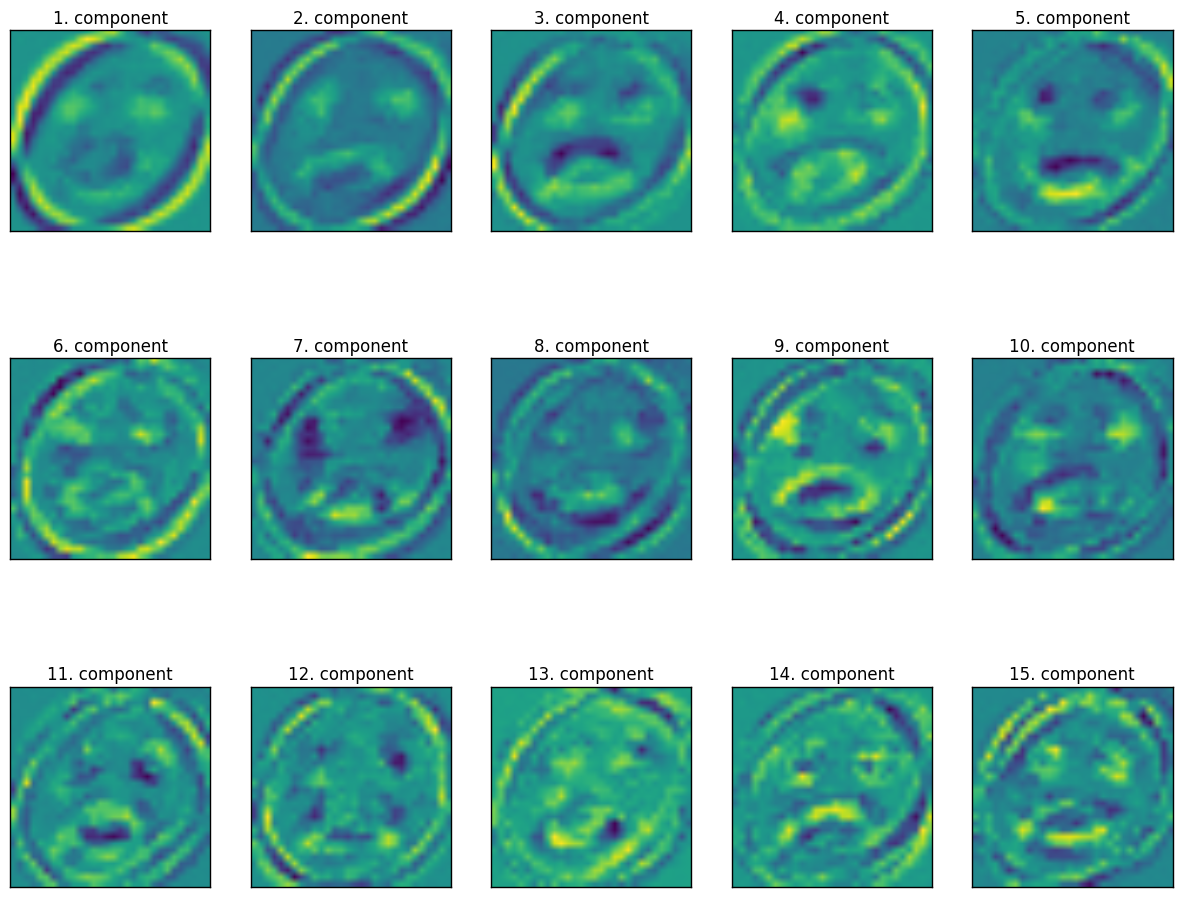

In [31]:
fix, axes = plt.subplots(3,5, figsize=(15,12),subplot_kw={'xticks':(),'yticks':()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='viridis')
    ax.set_title("{}. component".format((i+1)))

In [32]:
#X_all_pca = pca.transform(imdata)
predict_test_ = knn.predict(X_test_pca)

In [33]:
predict_test_

array([ 0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,
        1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
        1.,  1.,  0.,  1.])

In [34]:
y_test

array([ 0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
        1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,
        0.,  1.,  0.,  1.])

## Displaying the test set (incorrect classifications are prefixed with X: )

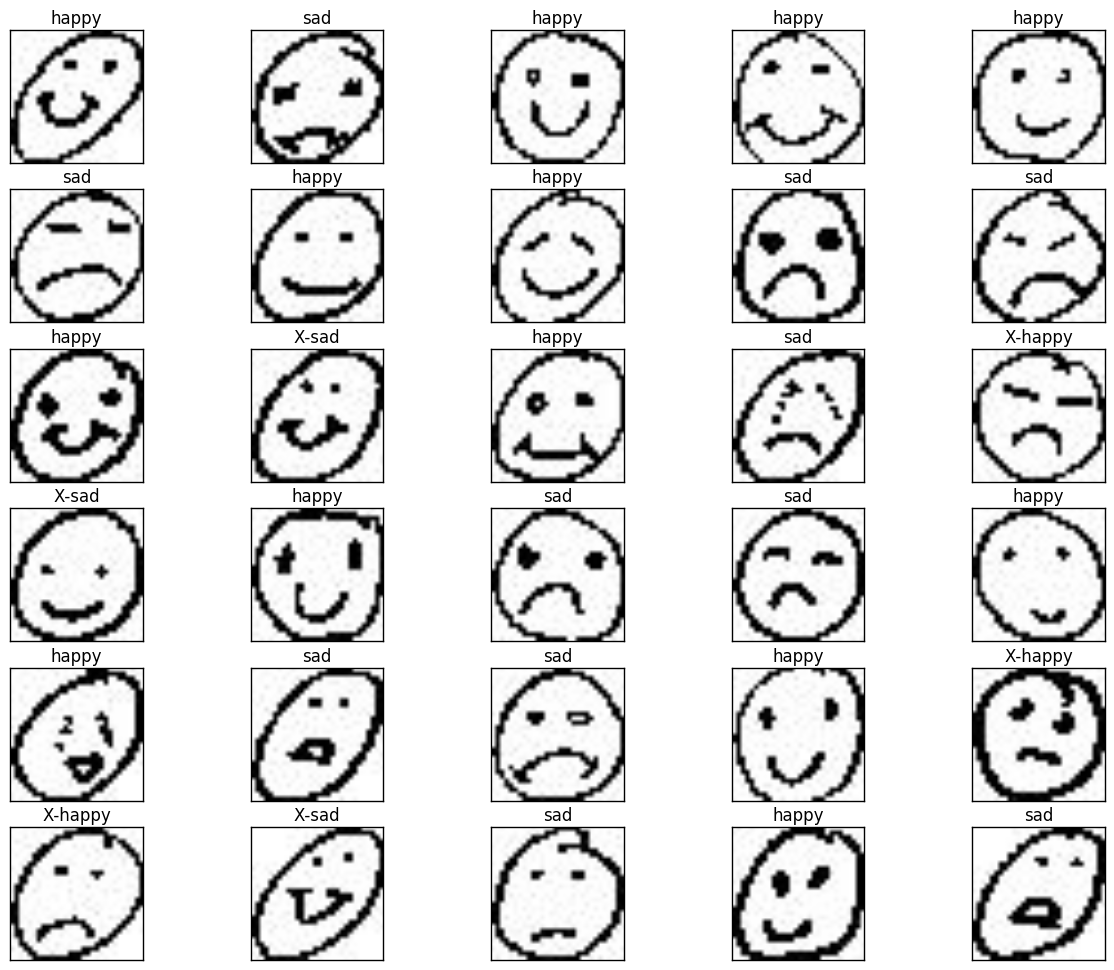

In [35]:
fix1, axes1 = plt.subplots(6,5, figsize=(15,12),subplot_kw={'xticks':(),'yticks':()})
for i, (component, ax) in enumerate(zip(X_test*255., axes1.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='gray')
    #ax.set_title("{}".format("happy" if predict_test_[i] == 0 else "sad"))    
    ax.set_title("{}{}".format("X-" if predict_test_[i] != y_test[i] else "",
                               "happy" if predict_test_[i] == 0 else "sad"))    

In [36]:
#find the nearest neighboors for the incorrectly classified faces

In [37]:
compare_index = 0
distance,nearest = knn.kneighbors(X_test_pca[compare_index].reshape(1,-1))
nearest,distance

(array([[30]]), array([[ 8.30327744]]))

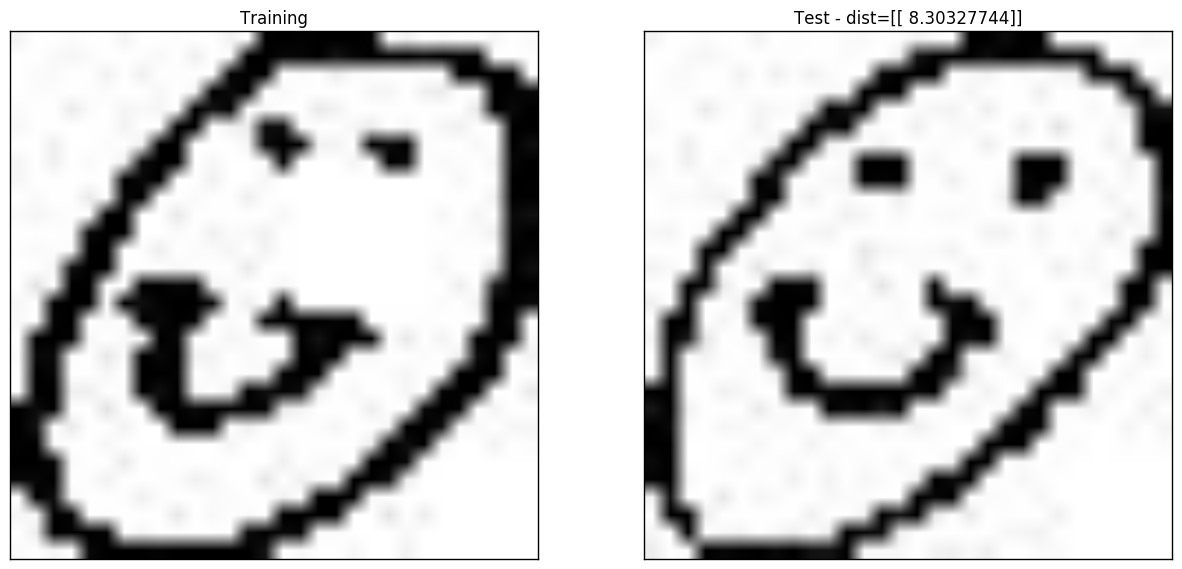

In [38]:
fix2, axes2 = plt.subplots(1,2, figsize=(15,19),subplot_kw={'xticks':(),'yticks':()})
axes2[0].imshow(X_train[nearest].reshape(image_shape)*255,cmap='gray')
axes2[0].set_title("Training")
axes2[1].imshow(X_test[compare_index].reshape(image_shape)*255,cmap='gray')
axes2[1].set_title("Test - dist={}".format(distance))

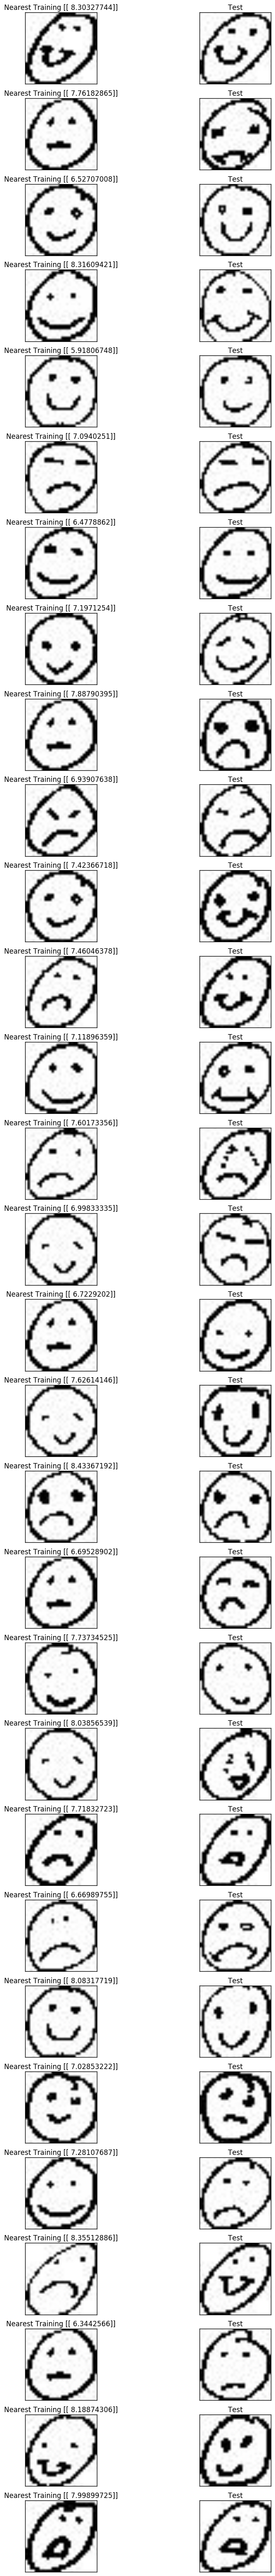

In [39]:
#finding the nearest neighboors for the whole test set
fix3, axes3 = plt.subplots(30,2,figsize=(10,80),subplot_kw={'xticks':(),'yticks':()})
for i, component in enumerate(X_test*255.):
    compare_index = i
    distance,nearest = knn.kneighbors(X_test_pca[i].reshape(1,-1))
    axes3[i,0].imshow(X_train[nearest].reshape(image_shape)*255,cmap='gray')
    axes3[i,0].set_title('Nearest Training {}'.format(distance))
    axes3[i,1].imshow(component.reshape(image_shape),cmap='gray')
    axes3[i,1].set_title("Test")